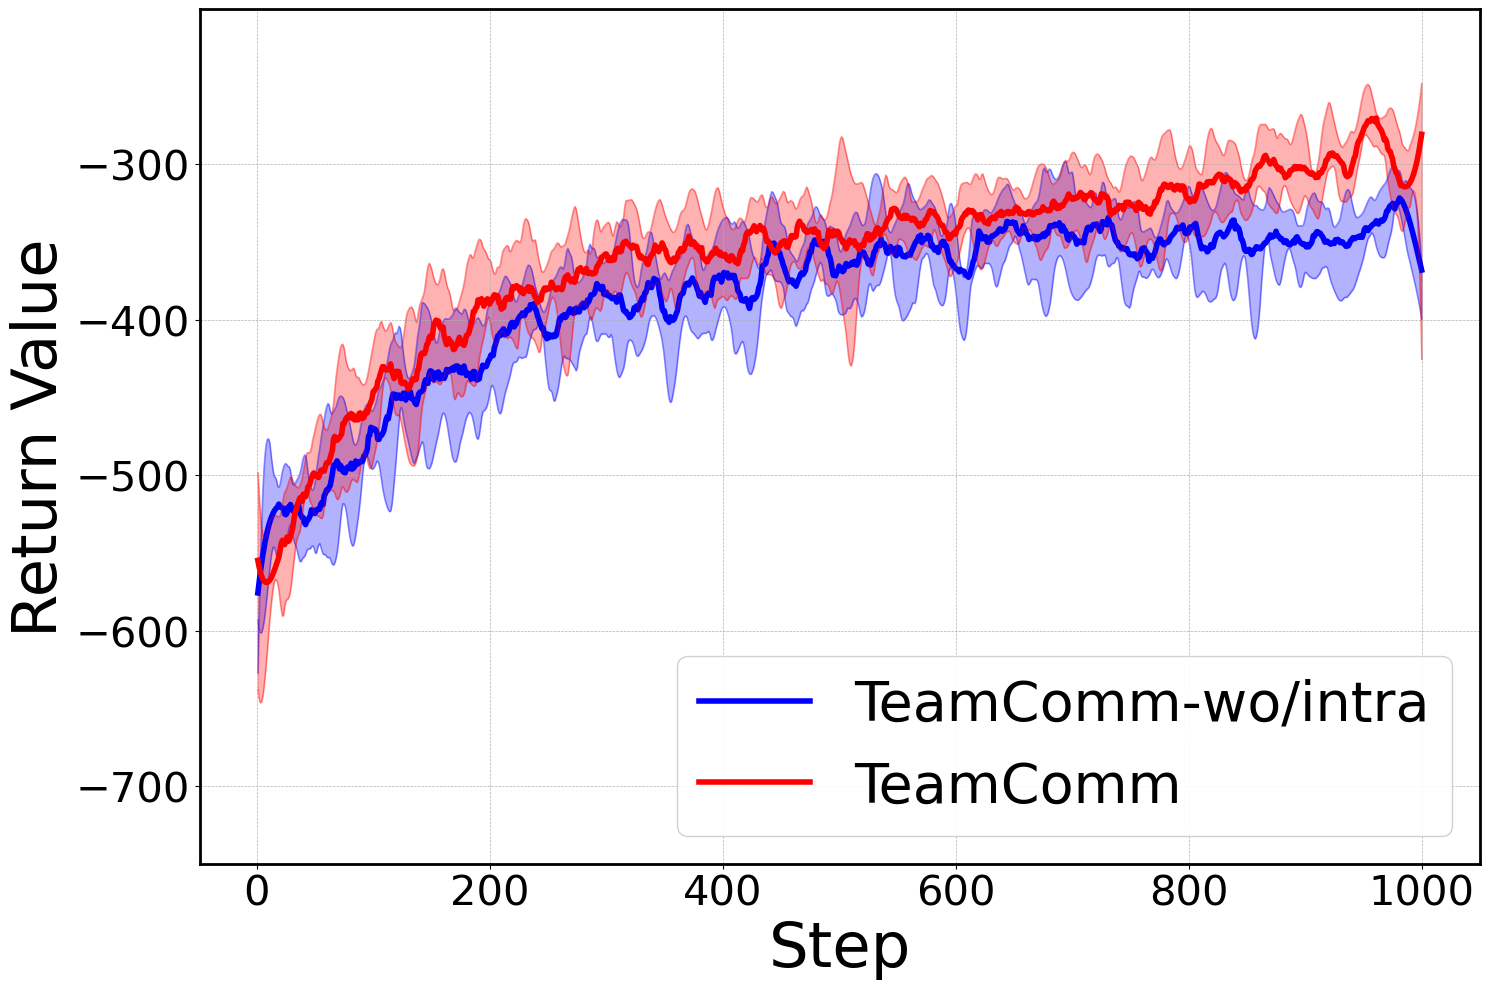

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema, savgol_filter
from scipy.interpolate import interp1d

# Load the intra.csv file
df_intra = pd.read_csv('intra.csv')

# Filtering columns that contain "episode_return" and ignoring those with "__MIN" or "__MAX"
selected_columns_intra = [col for col in df_intra.columns if "episode_return" in col and "__MIN" not in col and "__MAX" not in col]

# Extracting the data for the selected columns
selected_data_intra = df_intra[selected_columns_intra]
x_intra = df_intra['epoch']

# Define the smoothing and bound calculation function
def compute_smoothed_bounds(data, x, window_size_bounds, poly_order):
    upper_idx = argrelextrema(data.to_numpy(), np.greater)[0]
    lower_idx = argrelextrema(data.to_numpy(), np.less)[0]
    
    upper_points_x = x.iloc[upper_idx]
    upper_points_y = data.iloc[upper_idx]
    lower_points_x = x.iloc[lower_idx]
    lower_points_y = data.iloc[lower_idx]
    
    upper_interp = interp1d(upper_points_x, upper_points_y, kind='linear', fill_value='extrapolate')
    lower_interp = interp1d(lower_points_x, lower_points_y, kind='linear', fill_value='extrapolate')
    
    upper_bound = upper_interp(x)
    lower_bound = lower_interp(x)
    
    smoothed_upper_bound = savgol_filter(upper_bound, window_size_bounds, poly_order)
    smoothed_lower_bound = savgol_filter(lower_bound, window_size_bounds, poly_order)
    
    return smoothed_upper_bound, smoothed_lower_bound

# Define parameters for smoothing
window_size_data = 35
window_size_bounds = 21  # Adjusted to ensure it's odd
poly_order = 3

# Initialize plot with enhanced aesthetics
plt.figure(figsize=(15, 10))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
cu = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(cu)
ax.spines['left'].set_linewidth(cu)
ax.spines['right'].set_linewidth(cu)
ax.spines['top'].set_linewidth(cu)

# Adjusted distinct colors for the two lines
distinct_colors_intra = ['blue', 'red']
custom_names_intra = ["TeamComm-wo/intra", "TeamComm"]

# Process and plot each of the two data columns
for idx, column in enumerate(selected_columns_intra):
    data_intra = selected_data_intra[column].dropna()  # Removing NaN values
    x_data_intra = x_intra[:len(data_intra)]
    
    smoothed_upper_bound_intra, smoothed_lower_bound_intra = compute_smoothed_bounds(data_intra, x_data_intra, window_size_bounds, poly_order)
    smoothed_data_intra = savgol_filter(data_intra, window_size_data, poly_order)
    
    # Plotting bounds
    plt.plot(x_data_intra, smoothed_upper_bound_intra, color=distinct_colors_intra[idx], linewidth=1, alpha=0.3)
    plt.plot(x_data_intra, smoothed_lower_bound_intra, color=distinct_colors_intra[idx], linewidth=1, alpha=0.3)
    
    # Filling between bounds
    plt.fill_between(x_data_intra, smoothed_upper_bound_intra, smoothed_lower_bound_intra, color=distinct_colors_intra[idx], alpha=0.3)
    
    # Plotting smoothed data
    plt.plot(x_data_intra, smoothed_data_intra, label=custom_names_intra[idx], color=distinct_colors_intra[idx], linewidth=4)

# Customize and show plot
plt.legend(loc='lower right', fontsize=40, framealpha=0.9)
plt.xlabel('Step', fontsize=45)
plt.ylabel('Return Value', fontsize=45)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(bottom=-750)
yticks = np.arange(-700, plt.gca().get_ylim()[1] + 100, 100)
plt.yticks(yticks, fontsize=30)
if len(yticks) > 1:
    plt.yticks(yticks[:-1], fontsize=30)
plt.tight_layout()
plt.show()


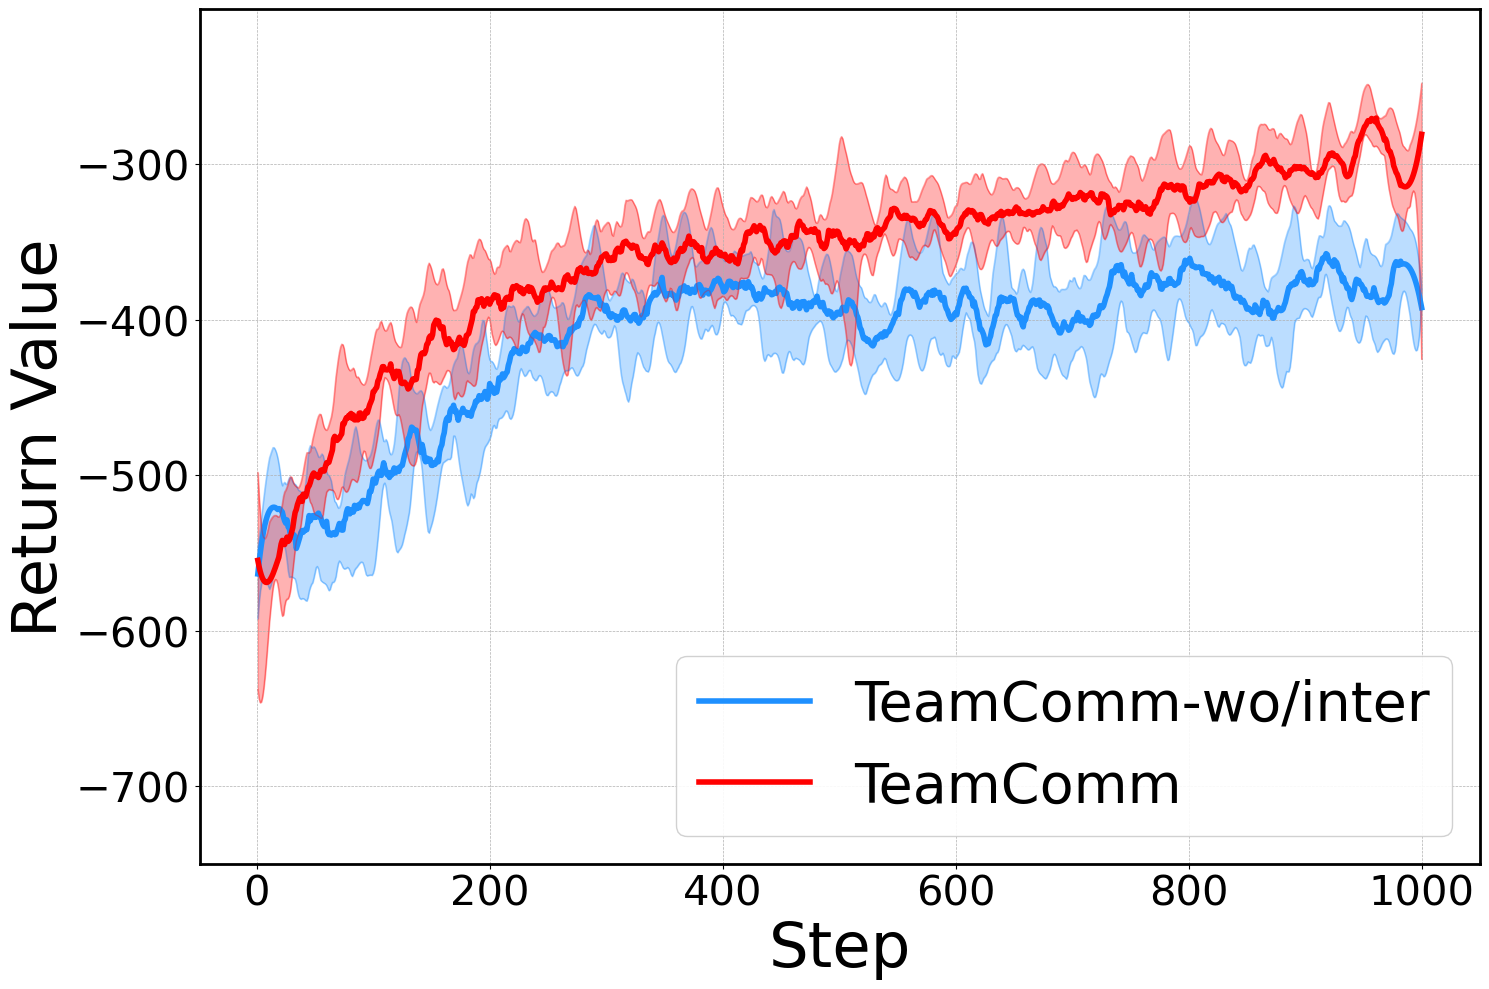

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema, savgol_filter
from scipy.interpolate import interp1d

# Load the inter.csv file
df_inter = pd.read_csv('inter.csv')

# Filtering columns that contain "episode_return" and ignoring those with "__MIN" or "__MAX"
selected_columns_inter = [col for col in df_inter.columns if "episode_return" in col and "__MIN" not in col and "__MAX" not in col]

# Extracting the data for the selected columns
x_inter = df_inter['epoch']

# Define the smoothing and bound calculation function
def compute_smoothed_bounds(data, x, window_size_bounds, poly_order):
    upper_idx = argrelextrema(data.to_numpy(), np.greater)[0]
    lower_idx = argrelextrema(data.to_numpy(), np.less)[0]
    
    upper_points_x = x.iloc[upper_idx]
    upper_points_y = data.iloc[upper_idx]
    lower_points_x = x.iloc[lower_idx]
    lower_points_y = data.iloc[lower_idx]
    
    upper_interp = interp1d(upper_points_x, upper_points_y, kind='linear', fill_value='extrapolate')
    lower_interp = interp1d(lower_points_x, lower_points_y, kind='linear', fill_value='extrapolate')
    
    upper_bound = upper_interp(x)
    lower_bound = lower_interp(x)
    
    smoothed_upper_bound = savgol_filter(upper_bound, window_size_bounds, poly_order)
    smoothed_lower_bound = savgol_filter(lower_bound, window_size_bounds, poly_order)
    
    return smoothed_upper_bound, smoothed_lower_bound

# Define parameters for smoothing
window_size_data = 35
window_size_bounds = 21  # Adjusted to ensure it's odd
poly_order = 3

# Adjusted distinct colors for the two lines
distinct_colors_inter = ['dodgerblue', 'red']
custom_names_inter = ["TeamComm-wo/inter", "TeamComm"]

# Plot initialization and rendering
plt.figure(figsize=(15, 10))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
cu = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(cu)
ax.spines['left'].set_linewidth(cu)
ax.spines['right'].set_linewidth(cu)
ax.spines['top'].set_linewidth(cu)

# Process and plot each of the two data columns
for idx, column in enumerate(selected_columns_inter):
    data_inter = df_inter[column].dropna()  # Removing NaN values
    x_data_inter = x_inter[:len(data_inter)]
    
    smoothed_upper_bound_inter, smoothed_lower_bound_inter = compute_smoothed_bounds(data_inter, x_data_inter, window_size_bounds, poly_order)
    smoothed_data_inter = savgol_filter(data_inter, window_size_data, poly_order)
    
    # Plotting bounds
    plt.plot(x_data_inter, smoothed_upper_bound_inter, color=distinct_colors_inter[idx], linewidth=1, alpha=0.3)
    plt.plot(x_data_inter, smoothed_lower_bound_inter, color=distinct_colors_inter[idx], linewidth=1, alpha=0.3)
    
    # Filling between bounds
    plt.fill_between(x_data_inter, smoothed_upper_bound_inter, smoothed_lower_bound_inter, color=distinct_colors_inter[idx], alpha=0.3)
    
    # Plotting smoothed data
    plt.plot(x_data_inter, smoothed_data_inter, label=custom_names_inter[idx], color=distinct_colors_inter[idx], linewidth=4)

# Customize and show plot
plt.legend(loc='lower right', fontsize=40, framealpha=0.9)
plt.xlabel('Step', fontsize=45)
plt.ylabel('Return Value', fontsize=45)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(bottom=-750)
yticks = np.arange(-700, plt.gca().get_ylim()[1] + 100, 100)
plt.yticks(yticks, fontsize=30)
if len(yticks) > 1:
    plt.yticks(yticks[:-1], fontsize=30)
plt.tight_layout()
plt.show()


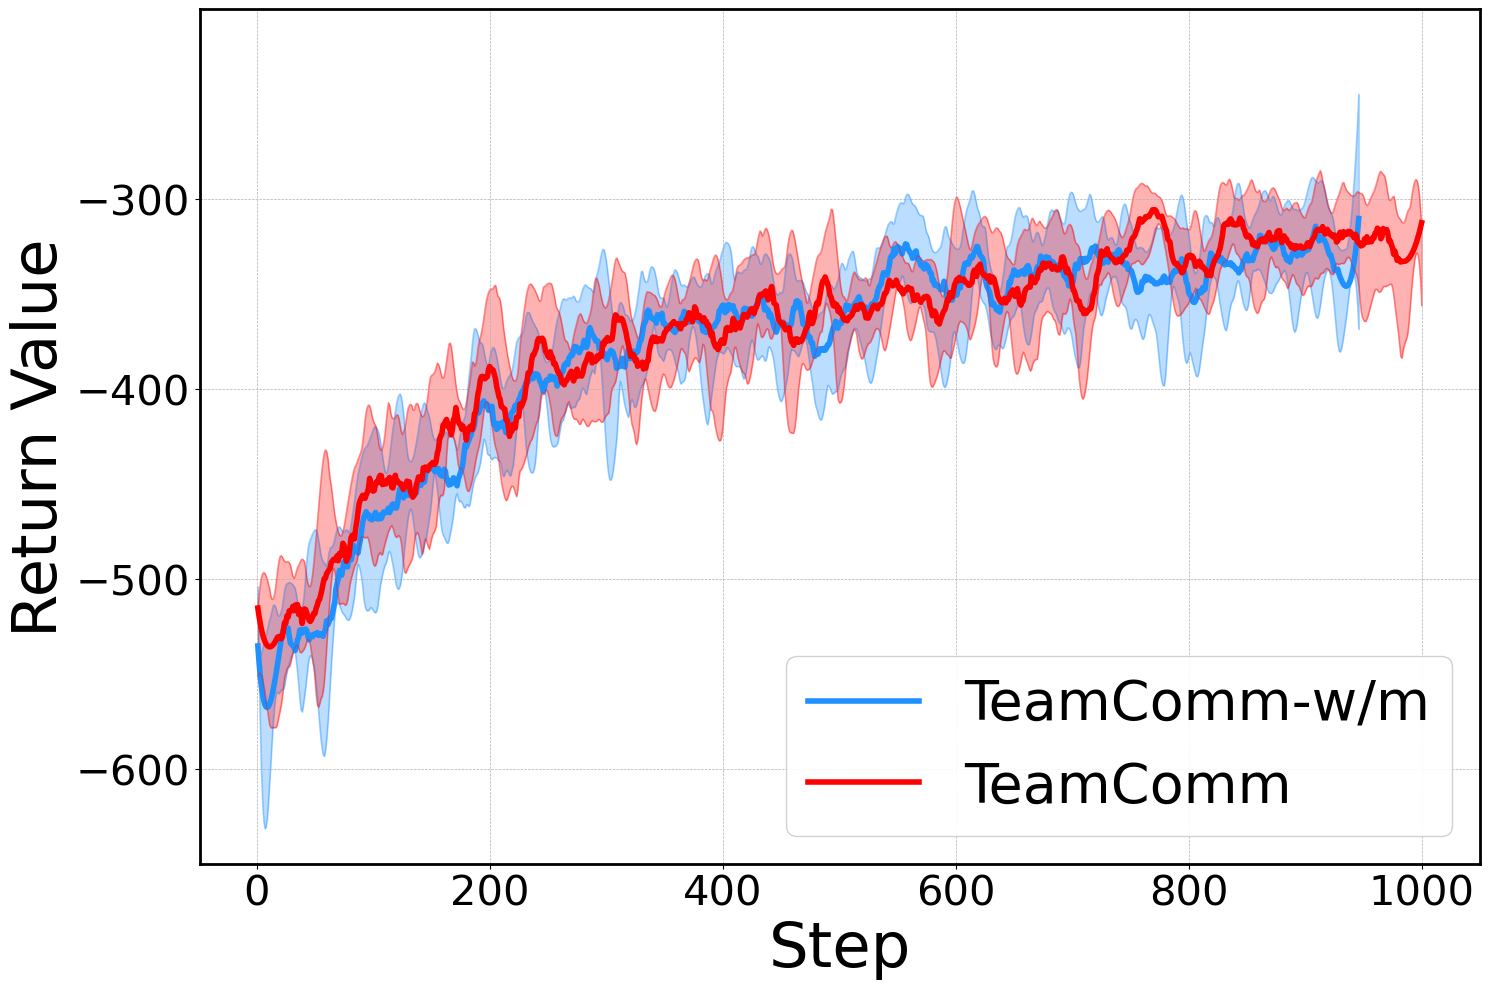

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema, savgol_filter
from scipy.interpolate import interp1d

# Load the mTF.csv file
df_mTF = pd.read_csv('mTF.csv')

# Filtering columns that contain "episode_return" and ignoring those with "__MIN" or "__MAX"
selected_columns_mTF = [col for col in df_mTF.columns if "episode_return" in col and "__MIN" not in col and "__MAX" not in col]

# Extracting the data for the selected columns
x_mTF = df_mTF['epoch']

# Define the smoothing and bound calculation function
def compute_smoothed_bounds(data, x, window_size_bounds, poly_order):
    upper_idx = argrelextrema(data.to_numpy(), np.greater)[0]
    lower_idx = argrelextrema(data.to_numpy(), np.less)[0]
    
    upper_points_x = x.iloc[upper_idx]
    upper_points_y = data.iloc[upper_idx]
    lower_points_x = x.iloc[lower_idx]
    lower_points_y = data.iloc[lower_idx]
    
    upper_interp = interp1d(upper_points_x, upper_points_y, kind='linear', fill_value='extrapolate')
    lower_interp = interp1d(lower_points_x, lower_points_y, kind='linear', fill_value='extrapolate')
    
    upper_bound = upper_interp(x)
    lower_bound = lower_interp(x)
    
    smoothed_upper_bound = savgol_filter(upper_bound, window_size_bounds, poly_order)
    smoothed_lower_bound = savgol_filter(lower_bound, window_size_bounds, poly_order)
    
    return smoothed_upper_bound, smoothed_lower_bound

# Define parameters for smoothing
window_size_data = 35
window_size_bounds = 21  # Adjusted to ensure it's odd
poly_order = 3

# Adjusted distinct colors for the two lines
distinct_colors_mTF = ['dodgerblue', 'red']
custom_names_mTF = ["TeamComm-w/m", "TeamComm"]

# Plot initialization and rendering
plt.figure(figsize=(15, 10))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
cu = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(cu)
ax.spines['left'].set_linewidth(cu)
ax.spines['right'].set_linewidth(cu)
ax.spines['top'].set_linewidth(cu)

# Process and plot each of the data columns
for idx, column in enumerate(selected_columns_mTF):
    data_mTF = df_mTF[column].dropna()  # Removing NaN values
    x_data_mTF = x_mTF[:len(data_mTF)]
    
    smoothed_upper_bound_mTF, smoothed_lower_bound_mTF = compute_smoothed_bounds(data_mTF, x_data_mTF, window_size_bounds, poly_order)
    smoothed_data_mTF = savgol_filter(data_mTF, window_size_data, poly_order)
    
    # Plotting bounds
    plt.plot(x_data_mTF, smoothed_upper_bound_mTF, color=distinct_colors_mTF[idx], linewidth=1, alpha=0.3)
    plt.plot(x_data_mTF, smoothed_lower_bound_mTF, color=distinct_colors_mTF[idx], linewidth=1, alpha=0.3)
    
    # Filling between bounds
    plt.fill_between(x_data_mTF, smoothed_upper_bound_mTF, smoothed_lower_bound_mTF, color=distinct_colors_mTF[idx], alpha=0.3)
    
    # Plotting smoothed data
    plt.plot(x_data_mTF, smoothed_data_mTF, label=custom_names_mTF[idx], color=distinct_colors_mTF[idx], linewidth=4)

# Customize and show plot
plt.legend(loc='lower right', fontsize=40, framealpha=0.9)
plt.xlabel('Step', fontsize=45)
plt.ylabel('Return Value', fontsize=45)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(bottom=-650)
yticks = np.arange(-600, plt.gca().get_ylim()[1] + 100, 100)
plt.yticks(yticks, fontsize=30)
if len(yticks) > 1:
    plt.yticks(yticks[:-1], fontsize=30)
plt.tight_layout()
plt.show()


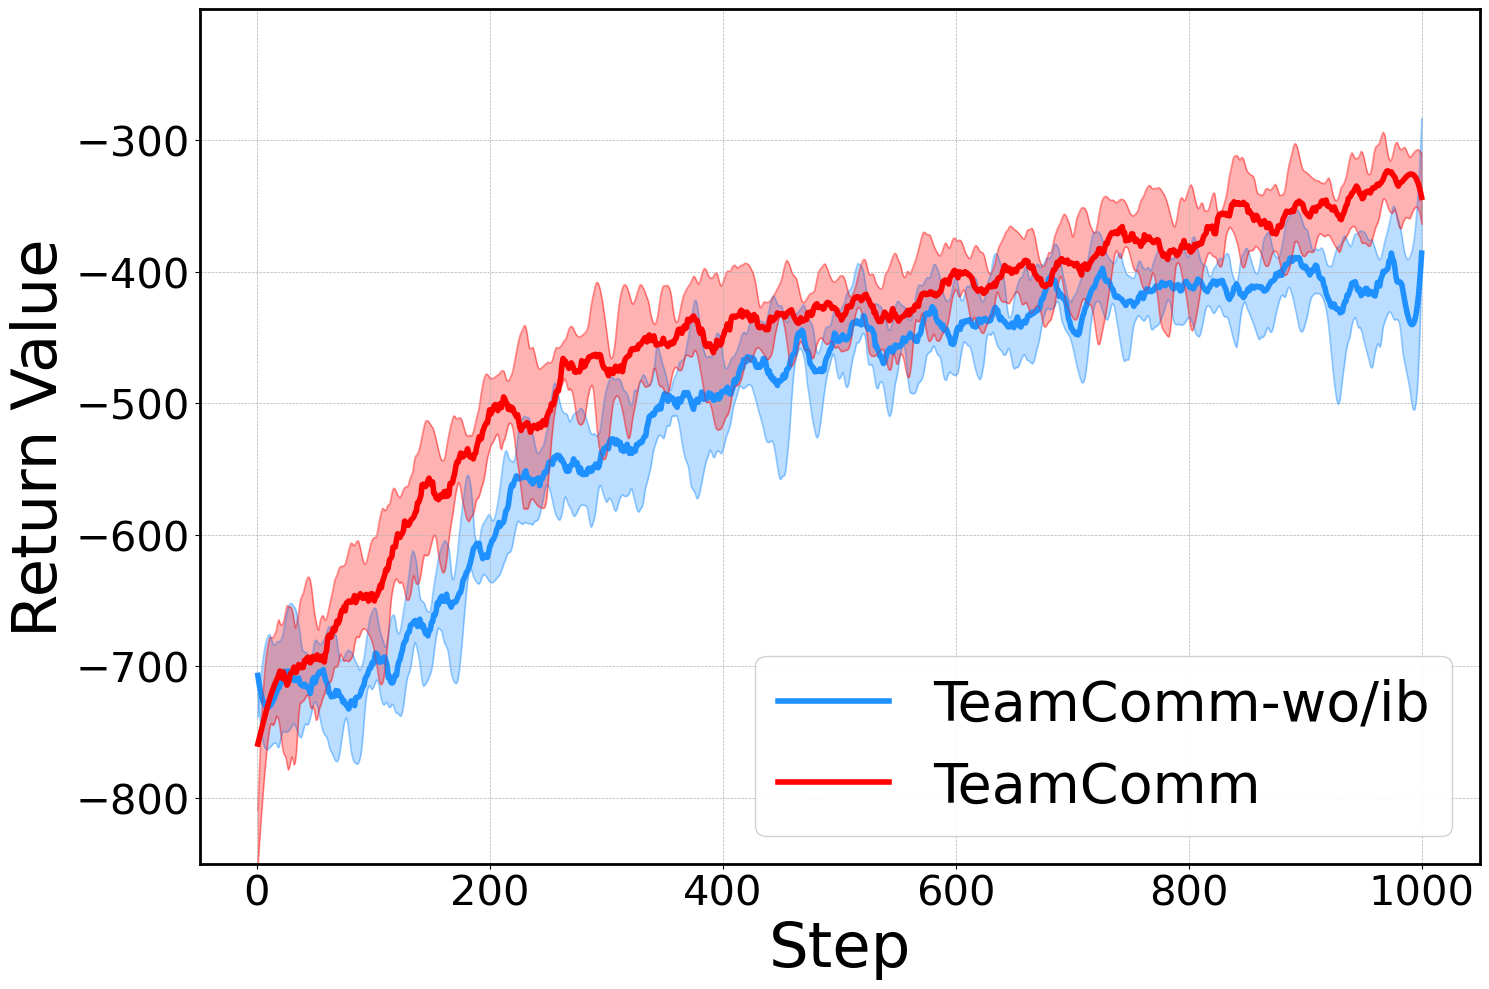

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema, savgol_filter
from scipy.interpolate import interp1d

# Load the vib.csv file
df_vib = pd.read_csv('vib.csv')

# Filtering columns that contain "episode_return" and ignoring those with "__MIN" or "__MAX"
selected_columns_vib = [col for col in df_vib.columns if "episode_return" in col and "__MIN" not in col and "__MAX" not in col]

# Extracting the data for the selected columns
x_vib = df_vib['epoch']

# Define the smoothing and bound calculation function
def compute_smoothed_bounds(data, x, window_size_bounds, poly_order):
    upper_idx = argrelextrema(data.to_numpy(), np.greater)[0]
    lower_idx = argrelextrema(data.to_numpy(), np.less)[0]
    
    upper_points_x = x.iloc[upper_idx]
    upper_points_y = data.iloc[upper_idx]
    lower_points_x = x.iloc[lower_idx]
    lower_points_y = data.iloc[lower_idx]
    
    upper_interp = interp1d(upper_points_x, upper_points_y, kind='linear', fill_value='extrapolate')
    lower_interp = interp1d(lower_points_x, lower_points_y, kind='linear', fill_value='extrapolate')
    
    upper_bound = upper_interp(x)
    lower_bound = lower_interp(x)
    
    smoothed_upper_bound = savgol_filter(upper_bound, window_size_bounds, poly_order)
    smoothed_lower_bound = savgol_filter(lower_bound, window_size_bounds, poly_order)
    
    return smoothed_upper_bound, smoothed_lower_bound

# Define parameters for smoothing
window_size_data = 35
window_size_bounds = 21  # Adjusted to ensure it's odd
poly_order = 3

# Adjusted distinct colors for the two lines
distinct_colors_vib = ['dodgerblue', 'red']
custom_names_vib = ["TeamComm-wo/ib", "TeamComm"]

# Plot initialization and rendering
plt.figure(figsize=(15, 10))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
cu = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(cu)
ax.spines['left'].set_linewidth(cu)
ax.spines['right'].set_linewidth(cu)
ax.spines['top'].set_linewidth(cu)

# Process and plot each of the data columns
for idx, column in enumerate(selected_columns_vib):
    data_vib = df_vib[column].dropna()  # Removing NaN values
    x_data_vib = x_vib[:len(data_vib)]
    
    smoothed_upper_bound_vib, smoothed_lower_bound_vib = compute_smoothed_bounds(data_vib, x_data_vib, window_size_bounds, poly_order)
    smoothed_data_vib = savgol_filter(data_vib, window_size_data, poly_order)
    
    # Plotting bounds
    plt.plot(x_data_vib, smoothed_upper_bound_vib, color=distinct_colors_vib[idx], linewidth=1, alpha=0.3)
    plt.plot(x_data_vib, smoothed_lower_bound_vib, color=distinct_colors_vib[idx], linewidth=1, alpha=0.3)
    
    # Filling between bounds
    plt.fill_between(x_data_vib, smoothed_upper_bound_vib, smoothed_lower_bound_vib, color=distinct_colors_vib[idx], alpha=0.3)
    
    # Plotting smoothed data
    plt.plot(x_data_vib, smoothed_data_vib, label=custom_names_vib[idx], color=distinct_colors_vib[idx], linewidth=4)

# Customize and show plot
plt.legend(loc='lower right', fontsize=40, framealpha=0.9)
plt.xlabel('Step', fontsize=45)
plt.ylabel('Return Value', fontsize=45)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(bottom=-850)
yticks = np.arange(-800, plt.gca().get_ylim()[1] + 100, 100)
plt.yticks(yticks, fontsize=30)
if len(yticks) > 1:
    plt.yticks(yticks[:-1], fontsize=30)
plt.tight_layout()
plt.show()
